In [62]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\krist\AppData\Local\Temp\ipykernel_28656\3015883588.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Exercise 7 [L5]: Function approximation

Consider the function
$$
f(x) = min \{max\{-1,4(x-0.2\},1\}
$$


### 1. The ex ante code contains an example of how well linear interpolation can approximate this function. Re-do the analysis with: 
<ol type ="a">
<li> Cubic spline (use scipy.interpolate.CubicSpline) </li>
<li> Regression with regular polynomials of 4th order</li>
<li> Regression with Chebyshev polynomials (see Chebyshev.py) </li>
</ol>


Setup


In [63]:
# Define the function 
f = lambda x: np.minimum(np.maximum(-1,4*(x-0.2)),1)

interval = [-1,1]
N_known = 10      # Number of known points
N_true = 1000     # Number of true points
N = 150            # Number of points for interpolation

#Function values
x_true  = np.linspace(interval[0],interval[1],N_true)
f_true  = f(x_true)

# Points you want to interpolate
G = np.linspace(interval[0],interval[1],N)

#known points
x_known = np.linspace(-0.8,0.8,N_known)
f_known = f(x_known)

# Define the plot 
def plot(f_interp):
    fig = plt.figure(figsize=(10,4)) 
    ax = fig.add_subplot(1,1,1)
    ax.plot(x_true,f_true)
    ax.plot(G,f_interp,'red')
    ax.scatter(x_known,f_known)

    ax.set_xlabel("x")
    ax.set_ylabel("$f(x)$")
    plt.legend(('True','Interpolation','known nodes'))
    plt.axvline(x=0.8, ls='--',color='black')
    plt.axvline(x=-0.8,ls='--',color='black')

    plt.show()

Example. Linear interpolation

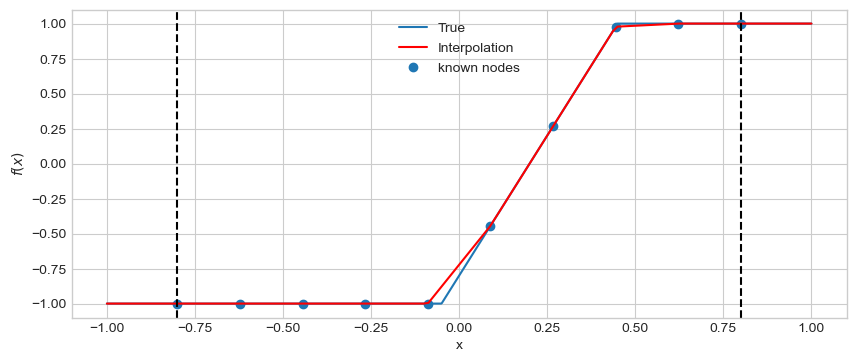

In [64]:
from scipy import interpolate

# Interpolate
f_linear_func = interpolate.interp1d(x_known,f_known, bounds_error=False, fill_value = "extrapolate")
f_linear_interp = f_linear_func(G)
#print(f"{f_linear_interp}, shape={np.shape(f_linear_interp)}")

# Plot
plot(f_linear_interp)

#### (1) Cubic spline (use scipy.interpolate.CubicSpline)

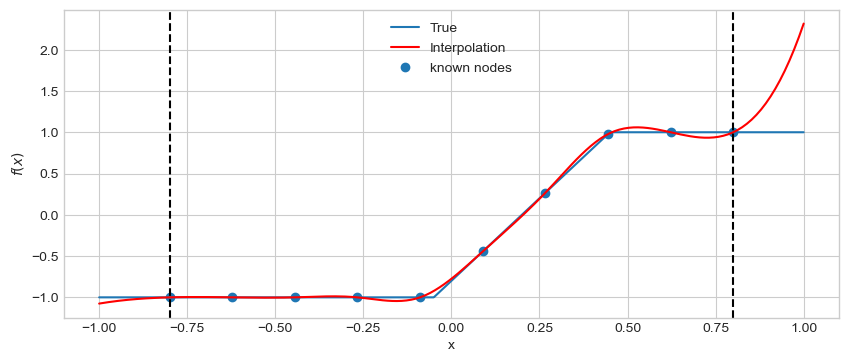

In [65]:
from scipy.interpolate import CubicSpline

# Interpolate

# fill in
#Hint: Check scipy documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html
cubicspline_interp= CubicSpline(x_known,f_known)
f_cubicspline_inter=cubicspline_interp(G)
f_cubicspline_inter=[*f_cubicspline_inter]
#print(f"{f_cubicspline_inter}, shape={np.shape(f_cubicspline_inter)}")
# Plot
plot(f_cubicspline_inter)



#### (2) Regression with regular polynomials of 4th order

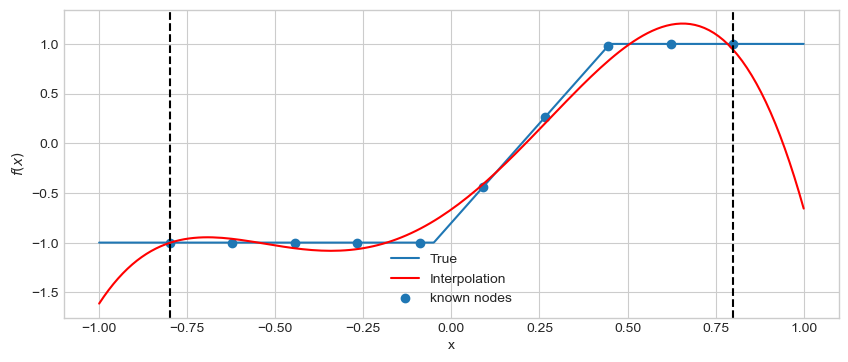

In [66]:
# sieve library for function approximation
degree = 4

# Define the variables for the regression
X = np.transpose([x_known**(i) for i in range(degree+1)])

b = np.linalg.inv(X.T@X) @ (X.T)@(f_known)

# Points to interpolate
X_grid = [G**(i) for i in range(degree+1)]
X_grid = np.transpose(X_grid)

# Find the interpolated function
f_reg_curvefit = X_grid @ b

# Plot
plot(f_reg_curvefit)

#### (3) Regression with Chebyshev polynomials (see Chebyshev.py)

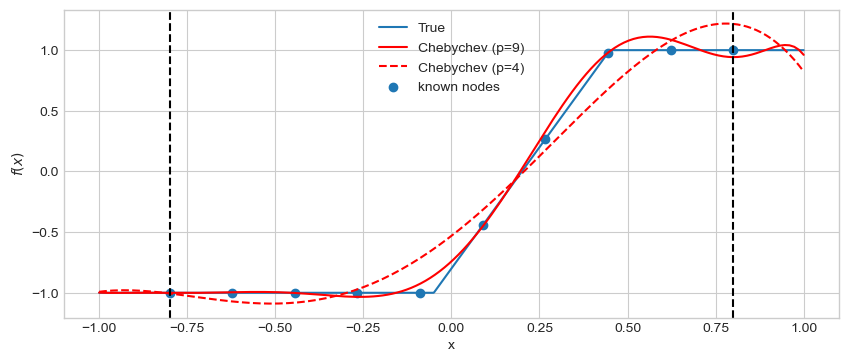

In [67]:
from Chebyshev import Chebyshev

f_chebyshev_9,_,_ = Chebyshev(f,G,N_known,9)
f_chebyshev_4,_,_ = Chebyshev(f,G,N_known,4)


# Plot
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)
ax.plot(x_true,f_true)
ax.plot(G,f_chebyshev_9,'red')
ax.plot(G,f_chebyshev_4,'red',ls='--')
ax.scatter(x_known,f_known)

ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
plt.legend(('True','Chebychev (p=9)','Chebychev (p=4)','known nodes'))
plt.axvline(x=0.8, ls='--',color='black')
plt.axvline(x=-0.8,ls='--',color='black')
plt.show()

### Next consider the function
$$
g(x,z) = (x+1)^{0.4} \cdot (z+1)^{0.4} + \mathbb{1}_{zx>0.3}
$$

### 2. Use the ex ante code to investigate how large the error is from using linear interpolation

In [71]:
# Define a function
g = lambda x,z: ((x+1)**0.4)*((z+1)**0.4)+1*(z*x>0.3)

# Values for interpolation
N_true = 500
x_true = np.linspace(0,1,N_true)
z_true = np.linspace(0,1,N_true)
x_true_mat, z_true_mat = np.meshgrid(x_true,z_true)
g_true = g(x_true_mat, z_true_mat)

# Known values
N_known = 20
x_known = np.linspace(0,1,N_known)
z_known = np.linspace(0,1,N_known)
x_known_mat, z_known_mat = np.meshgrid(x_known,z_known)
g_known = g(x_known_mat,z_known_mat)

# Linear interpolation
g_func_interp = interpolate.interp2d(x_known, z_known,g_known)

g_linear_interp = g_func_interp(x_true,z_true)

C:\Users\krist\AppData\Local\Temp\ipykernel_28656\2870549828.py:19: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  g_func_interp = interpolate.interp2d(x_known, z_known,g_known)
C:\Users\krist\AppData\Local\Temp\ipykernel_28656\2870549828.py:21: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev

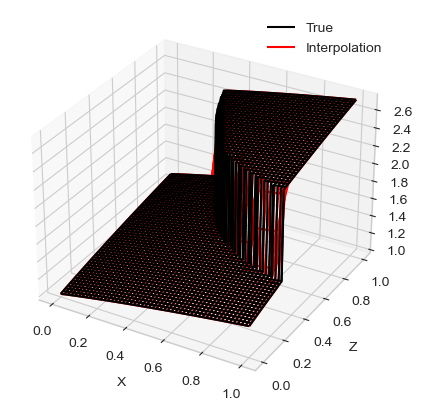

In [72]:
%matplotlib inline
# Plot the figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Plot the surface.
ax.plot_wireframe(x_true_mat, z_true_mat, g_true, color='black')
ax.plot_wireframe(x_true_mat, z_true_mat, g_linear_interp, color='red')
ax.set_xlabel(f'X')
ax.set_ylabel(f'Z')
ax.set_zlabel(f'g(x,z)')
plt.legend(('True','Interpolation'))

plt.show()  

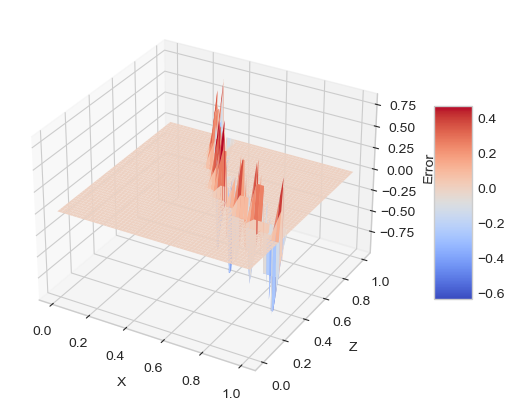

In [73]:
# Plot the interpolation error
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')
# Plot the surface.
#ax.plot_wireframe(x_true_mat, z_true_mat,g_linear_interp-g_true)
surf=ax.plot_surface(x_true_mat, z_true_mat,g_linear_interp-g_true, cmap=cm.coolwarm)
# Customize the axis.
ax.set_xlabel(f'X')
ax.set_ylabel(f'Z')
ax.set_zlabel(f'Error')
fig.colorbar(surf, shrink=0.5,aspect=5)

plt.show()  